# Построение границы решений для искусственной нейронной сети

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras  # Фреймворк для нейронных сетей
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential  # Последовательная модель
from tensorflow.keras.layers import Dense, Dropout  # Полносвязные слои и слой dropout

from utils.plot_points import plot_points
from utils.plot_decision_boundary import plot_decision_boundary
from utils.errors import step, sigmoid

warnings.filterwarnings("ignore", category=UserWarning, module='google.protobuf')

# Установка случайных seed для воспроизводимости результатов
np.random.seed(0)  # Фиксируем seed для numpy
tf.random.set_seed(1)  # Фиксируем seed для TensorFlow

# Создаём искусственный датасет "инопланетян"

In [2]:
data = {
    "Предложение": ["Аак", "Аак аак", "Бип", "Бип бип", "Аак бип", "Аак аак бип", "Бип аак бип", "Бип аак бип аак"],
    "Aaк": [1, 2, 0, 0, 1, 2, 1, 2],
    "Бип": [0, 0, 1, 2, 1, 1, 2, 2],
    "Настроение": ["Грустный", "Грустный", "Грустный", "Грустный", "Радостный", "Радостный", "Радостный", "Радостный"]
}

df = pd.DataFrame(data)
df

,Предложение,Aaк,Бип,Настроение
0,Аак,1,0,Грустный
1,Аак аак,2,0,Грустный
2,Бип,0,1,Грустный
3,Бип бип,0,2,Грустный
4,Аак бип,1,1,Радостный
5,Аак аак бип,2,1,Радостный
6,Бип аак бип,1,2,Радостный
7,Бип аак бип аак,2,2,Радостный


In [3]:
# Заменяем метки на числа
df['Настроение'] = df['Настроение'].map({'Грустный': 0, 'Радостный': 1})

X = df[['Aaк', 'Бип']].values  # X — только признаки
y = df['Настроение'].values  # y — только целевая переменная

# Общие настройки графики
figsize=(12, 4)
xlim=(-0.5, 3)
ylim=(-0.5, 3)
class_names=("Грустный (0)", "Радостный (1)")
xlabel='Количество "Аак"'
ylabel='Количество "Бип"'

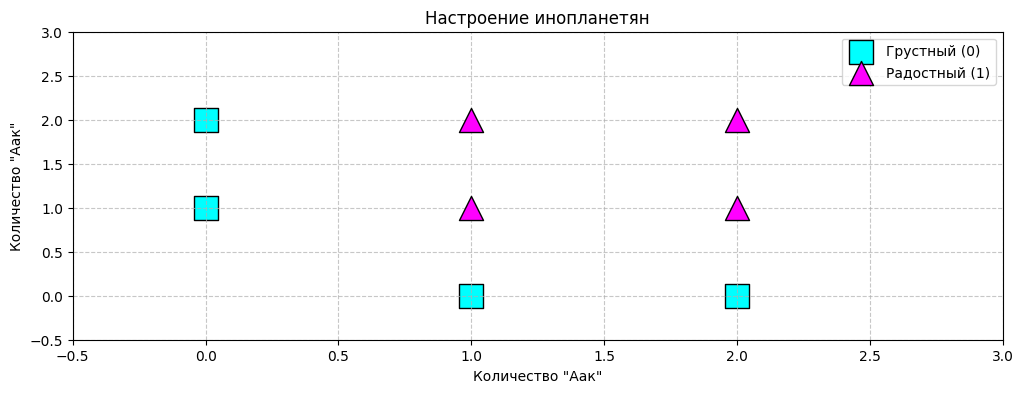

In [4]:
# Создаем фигуру
plt.figure(figsize=figsize)

# Рисуем точки
plot_points(X, y,
            point_size=300,
            class_names=class_names,
            xlabel=xlabel,
            ylabel=xlabel,
            xlim=xlim,
            ylim=ylim)

plt.title('Настроение инопланетян')
plt.show()

In [5]:
# Первый линейный классификатор (нейрон первого слоя)
def line_1(a, b):
    return step(6 * a + 10 * b - 15)  # веса: 6 и 10, смещение -15

# Второй линейный классификатор (нейрон первого слоя)
def line_2(a, b):
    return step(10 * a + 6 * b - 15)  # веса: 10 и 6, смещение -15

# Функция смещения (bias)
def bias(a, b):
    return 1  # всегда возвращает 1 (аналог единичного нейрона)

# Нейронная сеть с ступенчатой функцией активации (двухслойная)
def nn_with_step(a, b):
    # Комбинируем выходы первого слоя с весами 1 и 1, и смещением -1.5
    return step(step(6 * a + 10 * b - 15) + 
                step(10 * a + 6 * b - 15) - 1.5)

# Нейронная сеть с сигмоидной функцией активации (двухслойная)
def nn_with_sigmoid(a, b):
    # Комбинируем выходы первого слоя с весами 1.0 и 1.0, и смещением -1.5
    return sigmoid(1.0 * sigmoid(6 * a + 10 * b - 15) + 
                   1.0 * sigmoid(10 * a + 6 * b - 15) - 1.5)

# Визуализация границ первого слоя (линейные классификаторы и смещение)

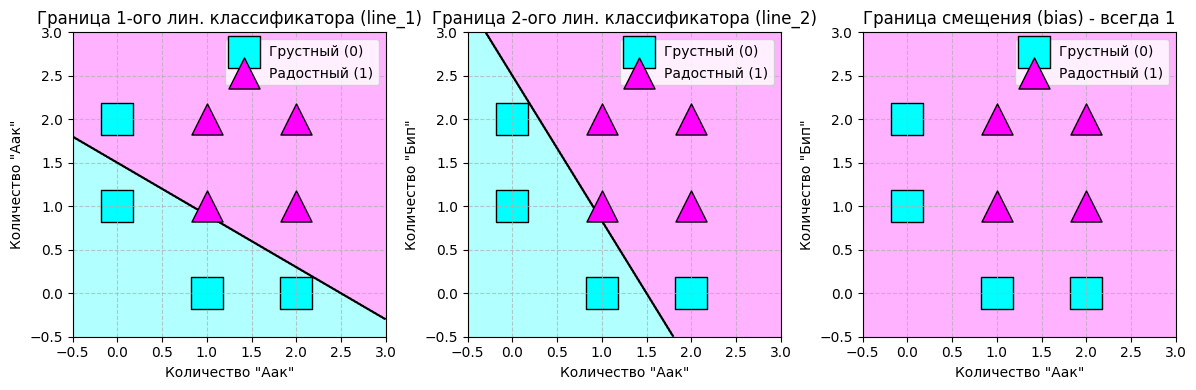

In [6]:
# Создаем фигуру с 1 строкой и 3 столбцами для первых трех графиков
plt.figure(figsize=figsize)

# Первый график - line_1
plt.subplot(1, 3, 1)
plot_decision_boundary(X, y, line_1,
                        point_size=500,
                        class_names=class_names,
                        xlabel=xlabel,
                        ylabel=xlabel,
                        xlim=xlim,
                        ylim=ylim)
plt.title("Граница 1-ого лин. классификатора (line_1)")


# Второй график - line_2
plt.subplot(1, 3, 2)
plot_decision_boundary(X, y, line_2,
                        point_size=500,
                        class_names=class_names,
                        xlabel=xlabel,
                        ylabel=ylabel,
                        xlim=xlim,
                        ylim=ylim)
plt.title("Граница 2-ого лин. классификатора (line_2)")


# Третий график - bias
plt.subplot(1, 3, 3)
plot_decision_boundary(X, y, bias,
                        point_size=500,
                        class_names=class_names,
                        xlabel=xlabel,
                        ylabel=ylabel,
                        xlim=xlim,
                        ylim=ylim)
plt.title("Граница смещения (bias) - всегда 1")

plt.tight_layout()
plt.show()

# Визуализация границ второго слоя (нелинейные классификаторы)

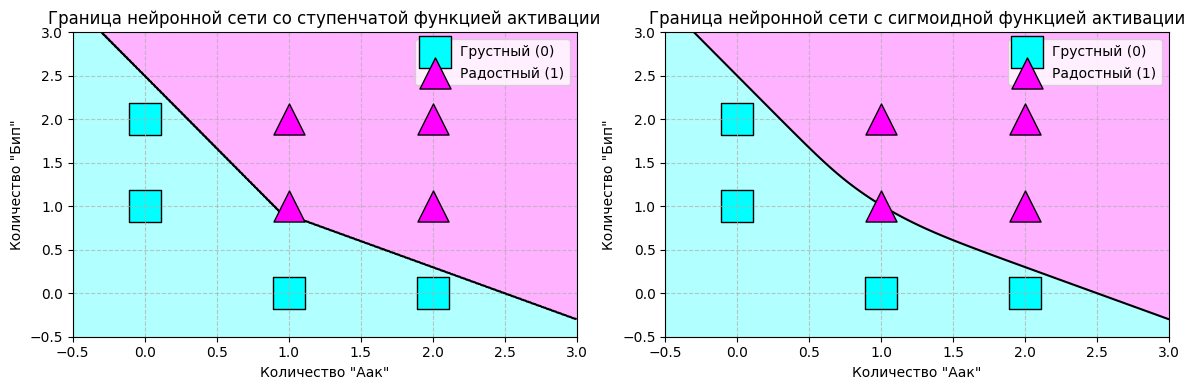

In [7]:
# Создаем фигуру с 1 строкой и 2 столбцами для следующих двух графиков
plt.figure(figsize=figsize)

# Первый график - nn_with_step
plt.subplot(1, 2, 1)
plot_decision_boundary(X, y, nn_with_step,
                    point_size=500,
                    class_names=class_names,
                    xlabel=xlabel,
                    ylabel=ylabel,
                    xlim=xlim,
                    ylim=ylim)
plt.title("Граница нейронной сети со ступенчатой функцией активации")


# Второй график - nn_with_sigmoid
plt.subplot(1, 2, 2)
plot_decision_boundary(X, y, nn_with_sigmoid,
                    point_size=500,
                    class_names=class_names,
                    xlabel=xlabel,
                    ylabel=ylabel,
                    xlim=xlim,
                    ylim=ylim)
plt.title("Граница нейронной сети с сигмоидной функцией активации")

plt.tight_layout()
plt.show()

# Графический пример классификации точек на плоскости с использованием нейронной сети

## Загрузка датасета

In [8]:
# Загружаем датасет 'one_circle.csv' (один круг)
df = pd.read_csv('data/one_circle.csv', index_col=0)  # Читаем CSV-файл, первый столбец - индекс

x = np.array(df[['x_1', 'x_2']])  # Извлекаем признаки x_1 и x_2 в numpy массив
y = np.array(df['y']).astype(int)  # Извлекаем метки классов и преобразуем в целые числа

df

,x_1,x_2,y
0,-0.759416,2.753240,0
1,-1.885278,1.629527,0
2,2.463302,-1.023869,0
3,-1.986004,-0.898810,0
4,2.010834,-2.580117,0
...,...,...,...
105,-1.376637,2.778703,1
106,-0.703722,0.215382,1
107,0.729767,-2.479655,1
108,-1.715920,-0.393404,1


## Визуализация данных

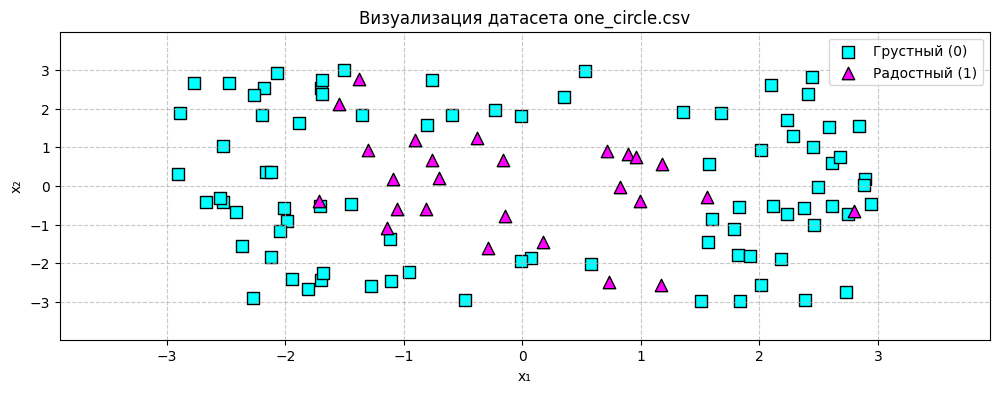

In [9]:
# Настройки графика
figsize = (12, 4)
xlim = (df['x_1'].min() - 1, df['x_1'].max() + 1)
ylim = (df['x_2'].min() - 1, df['x_2'].max() + 1)

plt.figure(figsize=figsize)
plot_points(x, y,
            class_names=class_names,
            xlim=xlim, ylim=ylim)
plt.title('Визуализация датасета one_circle.csv')
plt.show()

## Предварительная обработка данных

In [10]:
# Преобразуем метки классов в one-hot encoding (категориальный формат)
categorized_y = np.array(to_categorical(y, 2))  # Преобразуем y в one-hot векторы (2 класса)

## Создание и компиляция нейронной сети

In [11]:
# Строим модель нейронной сети
model = Sequential()  # Создаем последовательную модель

# Добавляем слои:
# 1. Полносвязный слой с 128 нейронами, активация ReLU, входная размерность 2 (x_1 и x_2)
model.add(Dense(128, activation='relu', input_shape=(2,)))

# 2. Слой Dropout с вероятностью 20% (для предотвращения переобучения)
model.add(Dropout(.2))

# 3. Полносвязный слой с 64 нейронами и активацией ReLU
model.add(Dense(64, activation='relu'))

# 4. Еще один слой Dropout с вероятностью 20%
model.add(Dropout(.2))

# 5. Выходной слой с 2 нейронами (по числу классов) и активацией softmax (для вероятностей классов)
model.add(Dense(2, activation='softmax'))

# Компилируем модель:
# - Функция потерь: категориальная кросс-энтропия (для многоклассовой классификации)
# - Оптимизатор: adam (адаптивный метод градиентного спуска)
# - Метрика: точность (accuracy)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Выводим информацию о модели
model.summary()  # Показывает архитектуру сети и количество параметров

C:\Users\novos\Desktop\GitHub\studied-it-books\02_grokking_machine_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,770 (34.26 KB)

 Trainable params: 8,770 (34.26 KB)

 Non-trainable params: 0 (0.00 B)

## Обучение нейронной сети

In [12]:
# Обучение нейронной сети
# Обучаем модель на данных:
# - x: признаки
# - categorized_y: метки в one-hot формате
# - epochs: 200 эпох (проходов по всему датасету)
# - batch_size: 10 (размер мини-пакета для градиентного спуска)
model.fit(x, categorized_y, epochs=200, batch_size=10, verbose=0)

## График классификации нейронной сети

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 4s 471us/step


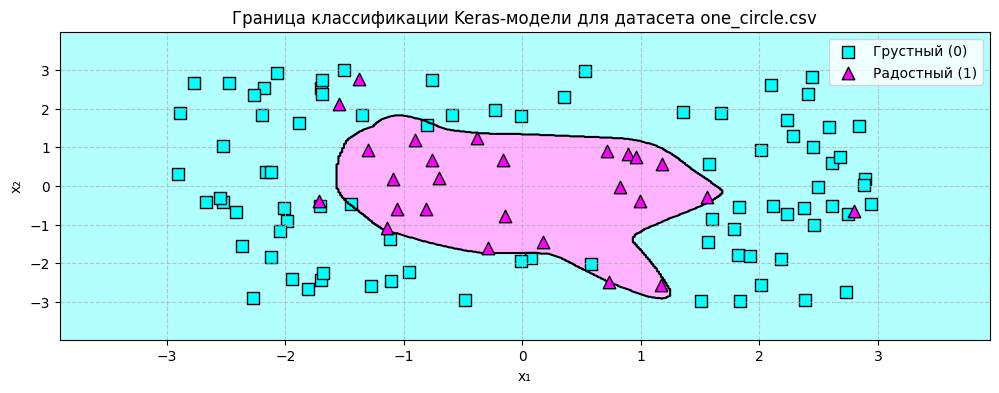

In [13]:
plt.figure(figsize=figsize)
plot_decision_boundary(x, y, model,
                       class_names=class_names,
                       xlim=xlim, ylim=ylim)
plt.title('Граница классификации Keras-модели для датасета one_circle.csv')
plt.show()


# Построение нейронной сети для распознавания изображений

In [14]:
# Импорт и загрузка набора данных MNIST (рукописные цифры)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Вывод размера наборов данных
print("Размер тренировочного набора", len(x_train))  # 60000 изображений
print("Размер тестового набора", len(x_test))  # 10000 изображений

Размер тренировочного набора 60000
Размер тестового набора 10000


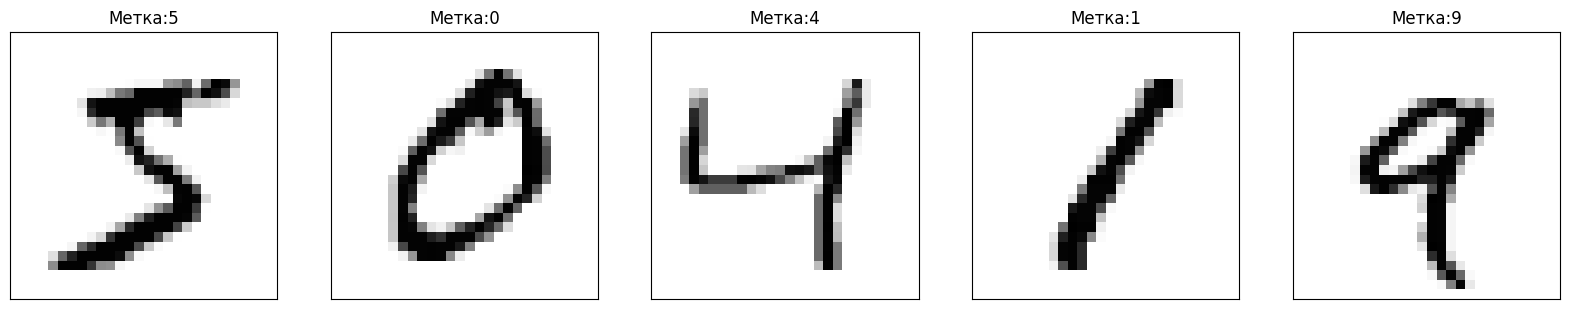

In [15]:
# Визуализация первых 5 изображений из тренировочного набора
fig = plt.figure(figsize=(20,20))  # Создаем фигуру большого размера
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])  # Создаем подграфики без осей
    ax.imshow(x_train[i], cmap='Greys')  # Показываем изображение
    ax.set_title('Метка:' + str(y_train[i]))  # Подписываем метку

## Предварительная обработка данных

In [16]:
# Изменение формы данных (преобразование изображений 28x28 в векторы 784x1)
x_train_reshaped = x_train.reshape(-1, 28*28)  # -1 означает автоматическое определение размера
x_test_reshaped = x_test.reshape(-1, 28*28)

# Преобразование меток в one-hot encoding (категориальные)
y_train_cat = to_categorical(y_train, 10)  # 10 классов (цифры 0-9)
y_test_cat = to_categorical(y_test, 10)

# Построение и обучение нейронной сети

In [17]:
# Создание модели
model = Sequential()  # Инициализация последовательной модели

# Добавление слоев:
model.add(Dense(128, activation='relu', input_shape=(28*28,)))  # Первый скрытый слой (128 нейронов)
model.add(Dropout(.2))  # Dropout для регуляризации (отключает 20% нейронов)
model.add(Dense(64, activation='relu'))  # Второй скрытый слой (64 нейрона)
model.add(Dropout(.2))  # Еще Dropout
model.add(Dense(10, activation='softmax'))  # Выходной слой (10 нейронов для 10 классов)

# Компиляция модели
model.compile(loss='categorical_crossentropy',  # Функция потерь для многоклассовой классификации
              optimizer='adam',  # Оптимизатор Adam
              metrics=['accuracy'])  # Метрика - точность

# Вывод информации о модели
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Обучение модели
model.fit(x_train_reshaped, y_train_cat, 
          epochs=10,  # Количество эпох обучения
          batch_size=10)  # Размер батча

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7161 - loss: 1.9510
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8531 - loss: 0.5491
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8805 - loss: 0.4519
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8910 - loss: 0.4210
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8973 - loss: 0.3977
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9011 - loss: 0.3840
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9066 - loss: 0.3649
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9107 - loss: 0.3613
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9134 - loss: 0.3459
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9141 - loss: 0.3422


In [19]:
# Получение предсказаний
predictions_vector = model.predict(x_test_reshaped)  # Получаем вектор вероятностей
predictions = [np.argmax(pred) for pred in predictions_vector]  # Преобразуем в метки классов

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step


Истинная метка: 4
Предсказание: 4


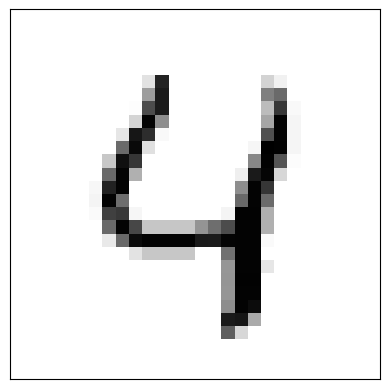

In [20]:
# Визуализация и проверка предсказания для 5-го тестового изображения
plt.imshow(x_test[4], cmap='Greys')
plt.xticks([])  # Убираем оси
plt.yticks([])
print("Истинная метка:", y_test[4])
print("Предсказание:", predictions[4])

Истинная метка: 3
Предсказание: 8


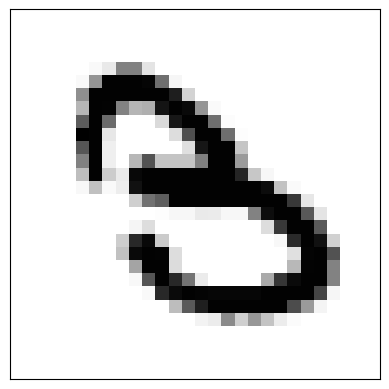

In [21]:
# Визуализация и проверка предсказания для 19-го тестового изображения
plt.imshow(x_test[18], cmap='Greys')
plt.xticks([])
plt.yticks([])
print("Истинная метка:", y_test[18])
print("Предсказание:", predictions[18])

In [22]:
# Оценка точности модели на тестовом наборе
num_correct = 0  # Счетчик правильных предсказаний
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        num_correct += 1

# Вывод результатов
print("Модель предсказала верно", num_correct, "раз из", len(y_test))
print("Точность модели:", num_correct/len(y_test))

Модель предсказала верно 9453 раз из 10000
Точность модели: 0.9453


# Использование нейронной сети регрессии для предсказания цен на жилье в Хайдарабаде

In [23]:
# Загрузка и предварительная обработка данных
housing = pd.read_csv('data/Hyderabad.csv')  # загружаем данные из CSV-файла

# Разделяем данные на признаки (features) и целевую переменную (labels)
features = housing.drop(['Location', 'Price'], axis=1)  # удаляем столбцы 'Location' и 'Price' - оставляем только признаки
labels = housing['Price']  # целевая переменная - цены на жилье

## Создание и обучение нейронной сети

In [24]:
# Строим модель последовательного типа (слои идут один за другим)
model = Sequential()

# Добавляем слои нейронной сети:

# Первый скрытый слой с 38 нейронами (по числу входных признаков), 
# функция активации ReLU и указание формы входных данных (38 признаков)
model.add(Dense(38, activation='relu', input_shape=(38,)))

# Слой Dropout для регуляризации - случайно "выключает" 20% нейронов для предотвращения переобучения
model.add(Dropout(.2))

# Второй скрытый слой с 128 нейронами и ReLU активацией
model.add(Dense(128, activation='relu'))

# Еще один слой Dropout
model.add(Dropout(.2))

# Третий скрытый слой с 64 нейронами и ReLU активацией
model.add(Dense(64, activation='relu'))

# Последний слой Dropout
model.add(Dropout(.2))

# Выходной слой с 1 нейроном (регрессия - предсказываем одно число - цену)
model.add(Dense(1))

# Компиляция модели:
# loss = 'mean_squared_error' - используем среднеквадратичную ошибку как функцию потерь
# optimizer='adam' - используем оптимизатор Adam
# metrics=[keras.metrics.RootMeanSquaredError()] - дополнительно отслеживаем RMSE в процессе обучения
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=[keras.metrics.RootMeanSquaredError()])

# Выводим информацию о структуре модели
model.summary()

C:\Users\novos\Desktop\GitHub\studied-it-books\02_grokking_machine_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 38)                  │           1,482 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 38)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,795 (57.79 KB)

 Trainable params: 14,795 (57.79 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Обучение модели:
# features - входные данные
# labels - целевые значения
# epochs=10 - количество эпох обучения
# batch_size=10 - размер батча (количество образцов для одного шага градиентного спуска)
model.fit(features, labels, epochs=10, batch_size=10)

Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - loss: 155232063455232.0000 - root_mean_squared_error: 12459216.0000
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 43327328092160.0000 - root_mean_squared_error: 6582350.0000
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 34020047978496.0000 - root_mean_squared_error: 5832670.5000
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 35502547795968.0000 - root_mean_squared_error: 5958401.5000
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 33749993521152.0000 - root_mean_squared_error: 5809474.5000
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 35573297315840.0000 - root_mean_squared_error: 5964335.5000
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 35449225609216.0000 - root_mean_squared_error: 5953925.0000
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34107746680832.0000 - root_mean_squared_error: 5840184.0000
Epoch 9/10
252/252 ━━━━━

## Оценка модели и предсказания

In [26]:
# Оценка качества модели на обучающих данных (возвращает loss и метрики, указанные при компиляции)
model.evaluate(features, labels)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 30725633998848.0000 - root_mean_squared_error: 5543071.0000


[30725633998848.0, 5543071.0]

In [27]:
# Получение предсказаний модели для всех входных данных
predictions = model.predict(features)

# Создаем DataFrame для сравнения
comparison_df = pd.DataFrame({
    'Истинная цена': labels,  # истинные значения
    'Предсказанная цена': predictions.flatten(),  # предсказания (flatten() преобразует 2D массив в 1D)
    'Разница': labels - predictions.flatten(),  # разница между истинным и предсказанным значением
    'Относительная ошибка (%)': ((labels - predictions.flatten()) / labels) * 100  # процент ошибки
})

# Сортировка по наибольшим абсолютным ошибкам
comparison_df['Абсолютная ошибка'] = abs(comparison_df['Разница'])

# Выводим первые 10 строк для наглядности
print("Сравнение истинных и предсказанных цен:")
display(comparison_df.sort_values('Абсолютная ошибка', ascending=False).head(20))

# Дополнительно можно вывести статистику по ошибкам
print("\nСтатистика по ошибкам:")
print(comparison_df['Относительная ошибка (%)'].describe())

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step
Сравнение истинных и предсказанных цен:


,Истинная цена,Предсказанная цена,Разница,Относительная ошибка (%),Абсолютная ошибка
2385,165000000,17742504.0,147257496.0,89.246967,147257496.0
2079,57500000,24315692.0,33184308.0,57.711840,33184308.0
1884,55000000,22281964.0,32718036.0,59.487338,32718036.0
1814,62300000,30987878.0,31312122.0,50.260228,31312122.0
2354,61400000,30528758.0,30871242.0,50.278896,30871242.0
1756,61000000,30342508.0,30657492.0,50.258184,30657492.0
2463,36000000,7512299.0,28487701.0,79.132503,28487701.0
1757,55800000,27761022.0,28038978.0,50.249065,28038978.0
1736,45000000,17420658.0,27579342.0,61.287427,27579342.0
2291,50000000,23863358.0,26136642.0,52.273284,26136642.0



Статистика по ошибкам:
count    2518.000000
mean      -33.780923
std        48.202884
min      -511.436303
25%       -61.294000
50%       -29.067743
75%         0.320623
max        89.246967
Name: Относительная ошибка (%), dtype: float64


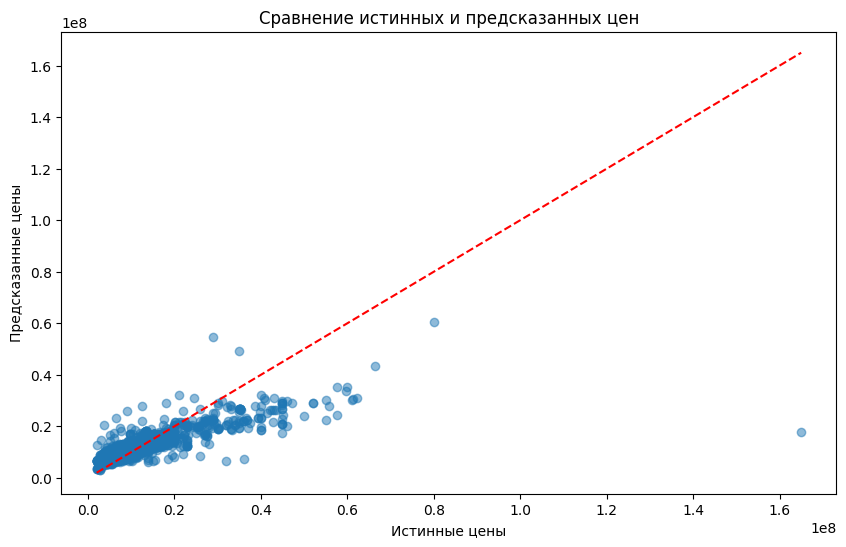

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(labels, predictions, alpha=0.5)
plt.plot([labels.min(), labels.max()], [labels.min(), labels.max()], 'r--')  # линия идеального предсказания
plt.xlabel('Истинные цены')
plt.ylabel('Предсказанные цены')
plt.title('Сравнение истинных и предсказанных цен')
plt.show()